<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xls to data (1).xls


In [ ]:
xlsx = pd.read_excel(r'data.xls')

In [ ]:
type(xlsx)
print(len(xlsx))

856


In [ ]:
xlsx.tail()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
851,2017/01/06,"1,810,000","32,000","177,619","321,737,489,344","1,809,000","1,822,000","1,802,000","254,629,600","140,679,337"
852,2017/01/05,"1,778,000","-30,000","219,349","392,320,929,368","1,803,000","1,803,000","1,777,000","250,127,861","140,679,337"
853,2017/01/04,"1,808,000","-16,000","159,435","289,084,849,500","1,825,000","1,826,000","1,805,000","254,348,241","140,679,337"
854,2017/01/03,"1,824,000","19,000","147,153","267,688,372,000","1,814,000","1,831,000","1,801,000","256,599,111","140,679,337"
855,2017/01/02,"1,805,000","3,000","93,012","167,931,825,000","1,799,000","1,812,000","1,794,000","253,926,203","140,679,337"


In [ ]:
xlsx.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2020/06/30,"52,800",400,"21,157,172","1,129,431,038,800","53,900","53,900","52,800","315,204,519","5,969,782,550"
1,2020/06/29,"52,400",-900,"17,776,925","934,880,364,880","52,500","53,200","52,000","312,816,606","5,969,782,550"
2,2020/06/26,"53,300","1,400","21,575,360","1,146,335,751,523","52,800","53,900","52,200","318,189,410","5,969,782,550"
3,2020/06/25,"51,900","-1,000","18,541,624","970,494,909,540","52,100","53,000","51,900","309,831,714","5,969,782,550"
4,2020/06/24,"52,900","1,500","24,519,552","1,301,305,533,100","51,900","53,900","51,600","315,801,497","5,969,782,550"


In [ ]:
xlsx = xlsx.rename(columns={"년/월/일" : "day", "종가":"close", "대비":"dif", "거래량(주)":"volume", "시가":"start", "고가":"high", "저가":"low"})

In [ ]:
del xlsx["거래대금(원)"]
del xlsx["시가총액(백만)"]
del xlsx["상장주식수(주)"]

In [ ]:
from datetime import datetime

In [ ]:
xlsx.loc[0, "day"]

'2020/06/30'

In [ ]:
strpDateTime = datetime.strptime("2020/06/30", "%Y/%m/%d")


In [ ]:
type(strpDateTime)

datetime.datetime

In [ ]:
print(strpDateTime)

2020-06-30 00:00:00


In [ ]:
for i in range(0, len(xlsx)):
  xlsx.loc[i, 'day'] = datetime.strptime(xlsx.loc[i,'day'], "%Y/%m/%d")


In [ ]:
xlsx

,day,close,dif,volume,start,high,low
0,2020-06-30 00:00:00,"52,800",400,"21,157,172","53,900","53,900","52,800"
1,2020-06-29 00:00:00,"52,400",-900,"17,776,925","52,500","53,200","52,000"
2,2020-06-26 00:00:00,"53,300","1,400","21,575,360","52,800","53,900","52,200"
3,2020-06-25 00:00:00,"51,900","-1,000","18,541,624","52,100","53,000","51,900"
4,2020-06-24 00:00:00,"52,900","1,500","24,519,552","51,900","53,900","51,600"
...,...,...,...,...,...,...,...
851,2017-01-06 00:00:00,"1,810,000","32,000","177,619","1,809,000","1,822,000","1,802,000"
852,2017-01-05 00:00:00,"1,778,000","-30,000","219,349","1,803,000","1,803,000","1,777,000"
853,2017-01-04 00:00:00,"1,808,000","-16,000","159,435","1,825,000","1,826,000","1,805,000"
854,2017-01-03 00:00:00,"1,824,000","19,000","147,153","1,814,000","1,831,000","1,801,000"


In [ ]:
sprice = xlsx[:511] # 2018년 6월1일부터 시작된 데이터만 사용

In [ ]:
sprice_s = sprice[::-1] #데이터를 시간순서로 정렬

In [ ]:
sprice_s.head()

,day,close,dif,volume,start,high,low
510,2018-06-01 00:00:00,"51,300",600,"13,038,499","50,500","51,700","49,950"
509,2018-06-04 00:00:00,"51,100",-200,"9,767,171","50,800","51,200","50,700"
508,2018-06-05 00:00:00,"51,300",200,"9,144,100","51,100","51,400","50,400"
507,2018-06-07 00:00:00,"50,600",-700,"13,590,016","51,800","51,800","50,500"
506,2018-06-08 00:00:00,"49,650",-950,"16,951,706","50,200","50,400","49,600"


In [ ]:
import numpy as np

In [ ]:
float(sprice_s.loc[0, 'close'].replace(",", ''))

52800.0

In [ ]:
for i in range(0, len(sprice_s)):
  sprice_s.loc[i, 'close'] = float(sprice_s.loc[i, 'close'].replace(",", ''))
  sprice_s.loc[i, 'dif'] = float(sprice_s.loc[i, 'dif'].replace(",", ''))
  sprice_s.loc[i, 'volume'] = float(sprice_s.loc[i, 'volume'].replace(",", ''))
  sprice_s.loc[i, 'start'] = float(sprice_s.loc[i, 'start'].replace(",", ''))
  sprice_s.loc[i, 'high'] = float(sprice_s.loc[i, 'high'].replace(",", ''))
  sprice_s.loc[i, 'low'] = float(sprice_s.loc[i, 'low'].replace(",", ''))
 

In [ ]:
sprice_s

,day,close,dif,volume,start,high,low
510,2018-06-01 00:00:00,51300,600,1.30385e+07,50500,51700,49950
509,2018-06-04 00:00:00,51100,-200,9.76717e+06,50800,51200,50700
508,2018-06-05 00:00:00,51300,200,9.1441e+06,51100,51400,50400
507,2018-06-07 00:00:00,50600,-700,1.359e+07,51800,51800,50500
506,2018-06-08 00:00:00,49650,-950,1.69517e+07,50200,50400,49600
...,...,...,...,...,...,...,...
4,2020-06-24 00:00:00,52900,1500,2.45196e+07,51900,53900,51600
3,2020-06-25 00:00:00,51900,-1000,1.85416e+07,52100,53000,51900
2,2020-06-26 00:00:00,53300,1400,2.15754e+07,52800,53900,52200
1,2020-06-29 00:00:00,52400,-900,1.77769e+07,52500,53200,52000


로컬 PC에 데이터를 저장하는 방법이다.

In [ ]:
sprice_s.to_csv('new_file.txt')
files.download('new_file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving new_file.txt to new_file (1).txt


In [ ]:
data = pd.read_csv('new_file.txt')

In [ ]:
data

,Unnamed: 0,day,close,dif,volume,start,high,low
0,510,2018-06-01 00:00:00,51300.0,600.0,13038499.0,50500.0,51700.0,49950.0
1,509,2018-06-04 00:00:00,51100.0,-200.0,9767171.0,50800.0,51200.0,50700.0
2,508,2018-06-05 00:00:00,51300.0,200.0,9144100.0,51100.0,51400.0,50400.0
3,507,2018-06-07 00:00:00,50600.0,-700.0,13590016.0,51800.0,51800.0,50500.0
4,506,2018-06-08 00:00:00,49650.0,-950.0,16951706.0,50200.0,50400.0,49600.0
...,...,...,...,...,...,...,...,...
506,4,2020-06-24 00:00:00,52900.0,1500.0,24519552.0,51900.0,53900.0,51600.0
507,3,2020-06-25 00:00:00,51900.0,-1000.0,18541624.0,52100.0,53000.0,51900.0
508,2,2020-06-26 00:00:00,53300.0,1400.0,21575360.0,52800.0,53900.0,52200.0
509,1,2020-06-29 00:00:00,52400.0,-900.0,17776925.0,52500.0,53200.0,52000.0


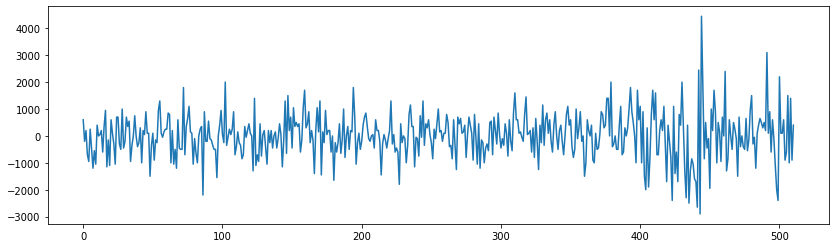

In [33]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.plot(data['dif'])
plt.show()

In [34]:
y_data = data.loc[1:501, 'dif']  # y는 종가의 차이로 전날에 영향을 받는다고 가정한다

In [35]:
data.loc[401,:] # y_data의 validation 기준일은 20년 1월 21이고 종가는 61400원이고 전날 대비 1000원 하락했다.

Unnamed: 0                      401
Unnamed: 0.1                    109
day             2020-01-21 00:00:00
close                         61400
dif                           -1000
volume                  1.11427e+07
start                         62000
high                          62400
low                           61200
Name: 401, dtype: object

In [36]:
x_data = data.loc[0:500, ['close', 'volume', 'start', 'high', 'low']]

In [37]:
x_data  = np.asarray(x_data, dtype=float)

In [38]:
y_data  = np.asarray(y_data, dtype=float)

In [39]:
print(x_data.shape, y_data.shape)

(501, 5) (501,)


In [40]:
x_train = x_data[0:400]
x_val = x_data[400:500]
print(x_train.shape, x_val.shape)

(400, 5) (100, 5)


In [41]:
y_train = y_data[0:400]
y_val = y_data[400:500]

In [ ]:
y_val[0]

-1000.0

In [42]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train-mean)/std

x_val = (x_val-mean)/std

In [ ]:
x_train[0:5]

array([[ 1.2268386 ,  0.49281082,  1.03245529,  1.21973112,  1.01758591],
       [ 1.17788744, -0.31375125,  1.10571587,  1.09754112,  1.20267445],
       [ 1.2268386 , -0.46737248,  1.17897645,  1.14641712,  1.12863903],
       [ 1.05550952,  0.62879006,  1.34991781,  1.24416912,  1.1533175 ],
       [ 0.82299148,  1.45763133,  0.95919471,  0.90203712,  0.93121126]])

In [43]:
x_train = x_train.reshape(-1,1,5) 
x_val = x_val.reshape(-1,1,5) # LSTM으로 들어가기 위해서 자료의 형태를 맞추어 준다. (샘플수, 타입스텝 수, 각 타입스텝의 특성수 )

In [ ]:
x_train[0:5]

array([[[ 1.2268386 ,  0.49281082,  1.03245529,  1.21973112,
          1.01758591]],

       [[ 1.17788744, -0.31375125,  1.10571587,  1.09754112,
          1.20267445]],

       [[ 1.2268386 , -0.46737248,  1.17897645,  1.14641712,
          1.12863903]],

       [[ 1.05550952,  0.62879006,  1.34991781,  1.24416912,
          1.1533175 ]],

       [[ 0.82299148,  1.45763133,  0.95919471,  0.90203712,
          0.93121126]]])

In [44]:
print(x_train.shape)

(400, 1, 5)


In [ ]:
from keras.layers import LSTM, Dense, Input
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras import Input

Using TensorFlow backend.


In [45]:
input1 = Input(shape=(1,5))
dense1 = LSTM(120)(input1)
dense1 = LSTM(30)(input1)
dense1 = Dense(20)(dense1)
#model.add(LSTM(60, input_shape=(1,5)))  # input_shape는 타임스텝수, 특성의 수
#model.add(LSTM(20))
output = Dense(1)(dense1)

model = Model(inputs= input1, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1, 5)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                4320      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=500, verbose=0)

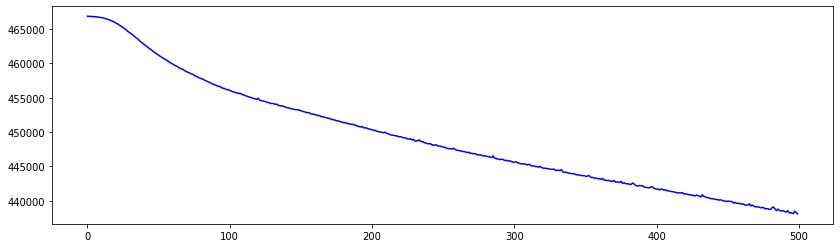

In [47]:
plt.plot(history.history['loss'], 'b') 
#plt.plot(history.history['val_loss'], 'r')
plt.show()

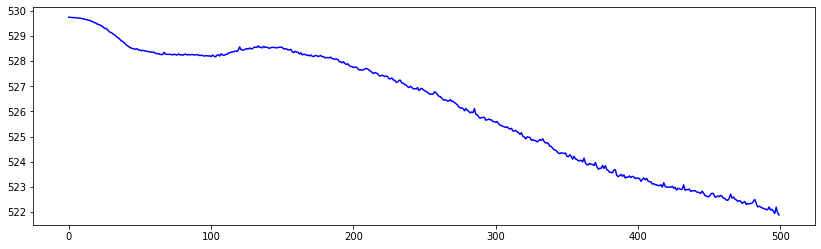

In [50]:
plt.plot(history.history['mae'], 'b') 
#plt.plot(history.history['val_mae'], 'r')
plt.show()

In [51]:
y_hat = model.predict(x_val)

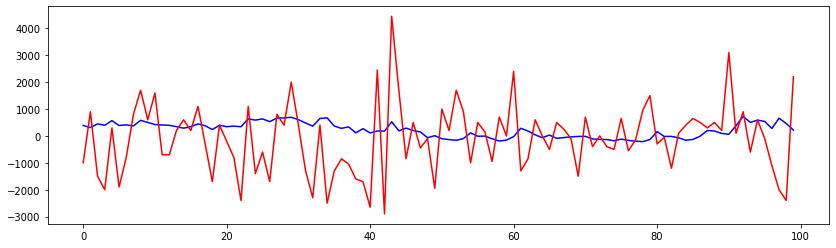

In [52]:
plt.plot(y_hat, 'b') 
plt.plot(y_val, 'r')
plt.show()

In [ ]:
data.loc[400,:] #20년 1월20일 종가는 62400원이었다

Unnamed: 0                      400
Unnamed: 0.1                    110
day             2020-01-20 00:00:00
close                         62400
dif                            1100
volume                  1.25289e+07
start                         62000
high                          62800
low                           61700
Name: 400, dtype: object

In [ ]:
price_hats = []
price_start = 62400.0

for i in range(0, len(y_hat)):
  price_start = price_start + y_hat[i]
  price_hats.append(price_start)


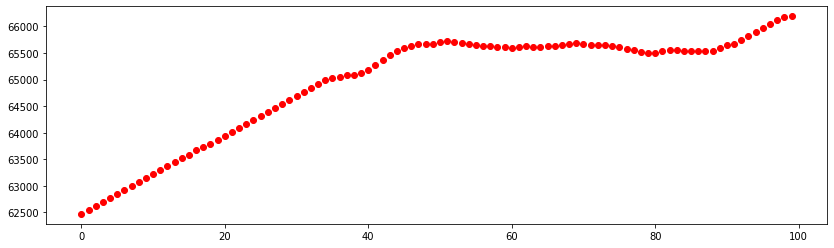

In [ ]:
plt.plot(price_hats, 'ro')
plt.show()

In [ ]:
 data.loc[401:500,['day','close']] # 20년 1월21일 부터 시작하여 100일간 종가 필요

,day,close
401,2020-01-21 00:00:00,61400.0
402,2020-01-22 00:00:00,62300.0
403,2020-01-23 00:00:00,60800.0
404,2020-01-28 00:00:00,58800.0
405,2020-01-29 00:00:00,59100.0
...,...,...
496,2020-06-10 00:00:00,55400.0
497,2020-06-11 00:00:00,54300.0
498,2020-06-12 00:00:00,52300.0
499,2020-06-15 00:00:00,49900.0


In [ ]:
price_real = data.loc[401:500, 'close']
price_real = np.asarray(price_real, dtype=float)

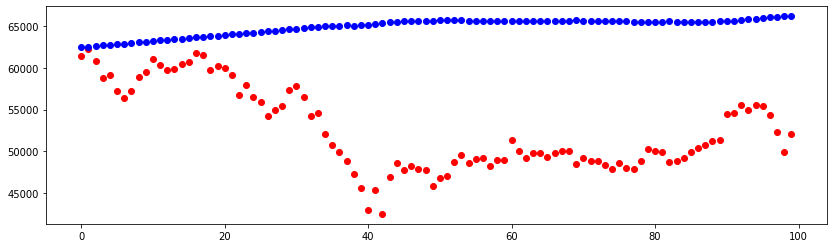

In [ ]:
plt.plot(price_real, 'ro')
plt.plot(price_hats, 'bo')
plt.show()

아래는 Colab 구글 드라이브에 Data를 저장하고 다운로드 하는 방법이다.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls /gdrive

'My Drive'


In [ ]:
data.to_csv('/gdrive/My Drive/data.txt')

In [3]:
!ls /gdrive/My\ Drive/data.txt

'/gdrive/My Drive/data.txt'


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('/gdrive/My Drive/data.txt')

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,day,close,dif,volume,start,high,low
0,0,510,2018-06-01 00:00:00,51300.0,600.0,13038499.0,50500.0,51700.0,49950.0
1,1,509,2018-06-04 00:00:00,51100.0,-200.0,9767171.0,50800.0,51200.0,50700.0
2,2,508,2018-06-05 00:00:00,51300.0,200.0,9144100.0,51100.0,51400.0,50400.0
3,3,507,2018-06-07 00:00:00,50600.0,-700.0,13590016.0,51800.0,51800.0,50500.0
4,4,506,2018-06-08 00:00:00,49650.0,-950.0,16951706.0,50200.0,50400.0,49600.0
...,...,...,...,...,...,...,...,...,...
506,506,4,2020-06-24 00:00:00,52900.0,1500.0,24519552.0,51900.0,53900.0,51600.0
507,507,3,2020-06-25 00:00:00,51900.0,-1000.0,18541624.0,52100.0,53000.0,51900.0
508,508,2,2020-06-26 00:00:00,53300.0,1400.0,21575360.0,52800.0,53900.0,52200.0
509,509,1,2020-06-29 00:00:00,52400.0,-900.0,17776925.0,52500.0,53200.0,52000.0


다른 data 셀을 만들려고 한다.

In [7]:
data_n = data.loc[:, ["close", "volume", "start", "high", "low"]]

In [8]:
data_n

,close,volume,start,high,low
0,51300.0,13038499.0,50500.0,51700.0,49950.0
1,51100.0,9767171.0,50800.0,51200.0,50700.0
2,51300.0,9144100.0,51100.0,51400.0,50400.0
3,50600.0,13590016.0,51800.0,51800.0,50500.0
4,49650.0,16951706.0,50200.0,50400.0,49600.0
...,...,...,...,...,...
506,52900.0,24519552.0,51900.0,53900.0,51600.0
507,51900.0,18541624.0,52100.0,53000.0,51900.0
508,53300.0,21575360.0,52800.0,53900.0,52200.0
509,52400.0,17776925.0,52500.0,53200.0,52000.0


In [10]:
import numpy as np

In [11]:
data_n = np.asarray(data_n, dtype=float)

In [12]:
data_n[0:5]

array([[   51300., 13038499.,    50500.,    51700.,    49950.],
       [   51100.,  9767171.,    50800.,    51200.,    50700.],
       [   51300.,  9144100.,    51100.,    51400.,    50400.],
       [   50600., 13590016.,    51800.,    51800.,    50500.],
       [   49650., 16951706.,    50200.,    50400.,    49600.]])

In [13]:
data_n.shape

(511, 5)

In [14]:
data_n_L = []

for i in range(0, len(data_n)):
  if i < len(data_n)-4:
    ts = [data_n[i], data_n[i+1], data_n[i+2], data_n[i+3], data_n[i+4]]
    data_n_L.append(ts)

In [15]:
data_n_L = np.asarray(data_n_L)

In [16]:
data_n_L[0]

array([[   51300., 13038499.,    50500.,    51700.,    49950.],
       [   51100.,  9767171.,    50800.,    51200.,    50700.],
       [   51300.,  9144100.,    51100.,    51400.,    50400.],
       [   50600., 13590016.,    51800.,    51800.,    50500.],
       [   49650., 16951706.,    50200.,    50400.,    49600.]])

In [17]:
data_n_L.shape

(507, 5, 5)

In [18]:
data_n_d = data.loc[:, ["dif"]]

In [19]:
data_n_d = data_n_d[4:]

In [20]:
len(data_n_d)

507

In [21]:
x_train_L5 = data_n_L[0:400]
x_val_L5 = data_n_L[400:500]
y_train_L5= data_n_d[0:400]
y_val_L5 = data_n_d[400:500]

In [53]:
mean_L5 = np.mean(x_train_L5, axis=0)
std_L5 = np.std(x_train_L5, axis=0)

x_train_L5_r = (x_train_L5 - mean_L5)/std_L5
x_val_L5_r = (x_val_L5 - mean_L5)/std_L5

In [22]:
from keras.layers import LSTM, Dense, Input
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras import Input

Using TensorFlow backend.


In [54]:
input2 = Input(shape=(5,5))
dense2 = LSTM(120)(input2)
dense2 = Dense(120)(dense2)
dense2 = Dense(60)(dense2)
dense2 = Dense(30)(dense2)
#model.add(LSTM(60, input_shape=(1,5)))  # input_shape는 타임스텝수, 특성의 수
#model.add(LSTM(20))
output2 = Dense(1)(dense2)

model = Model(inputs= input2, outputs=output2)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 5, 5)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 120)               60480     
_________________________________________________________________
dense_12 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_13 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 84,121
Trainable params: 84,121
Non-trainable params: 0
_______________________________________________________

In [55]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train_L5_r, y_train_L5, validation_data = (x_val_L5_r, y_val_L5), epochs=100)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 0s 1ms/step - loss: 475565.4062 - mae: 535.5099 - val_loss: 1637137.9300 - val_mae: 974.0313
Epoch 2/100
400/400 [==============================] - 0s 251us/step - loss: 475509.3475 - mae: 535.5323 - val_loss: 1638271.2550 - val_mae: 974.1189
Epoch 3/100
400/400 [==============================] - 0s 249us/step - loss: 475285.7175 - mae: 535.4396 - val_loss: 1639047.4500 - val_mae: 974.1838
Epoch 4/100
400/400 [==============================] - 0s 257us/step - loss: 474903.5800 - mae: 535.4498 - val_loss: 1644699.6250 - val_mae: 974.5559
Epoch 5/100
400/400 [==============================] - 0s 275us/step - loss: 473483.1169 - mae: 534.8539 - val_loss: 1657134.1450 - val_mae: 975.1021
Epoch 6/100
400/400 [==============================] - 0s 264us/step - loss: 472029.2263 - mae: 534.6909 - val_loss: 1687051.6900 - val_mae: 978.5877
Epoch 7/100
400/400 [==============================] - 0

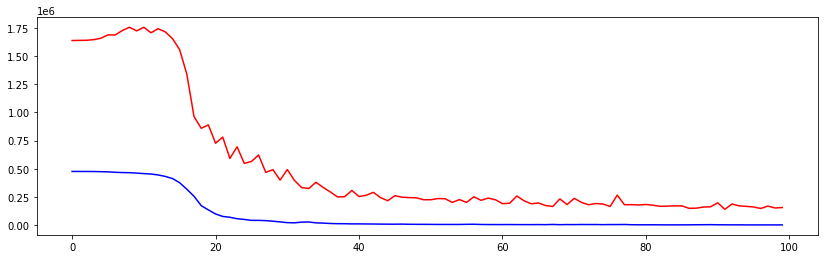

In [57]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)


plt.plot(history.history['loss'], 'b') 
plt.plot(history.history['val_loss'], 'r')
plt.show()